<a href="https://colab.research.google.com/github/nuvvulapraveen17/MachineLearning-DeepLearning/blob/main/Clustering/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this Note i have implemented KMeans algorithm Class and applied the algorithm on mall_customers data set from kaggle.**<br>

**Caution:** Kmeans is highly sensitive to initialization each initialization will gives different solutions.

I will implement Kmeans++ in my next notebook which is a stable initialization in comparision to KMeans

In [206]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data set from kaggle to colab
# Go to kaggle.com --> your account --> my  profile --> edit profile --> create new API Token --> it will download .json file 
#  after that install Kaggle API in co lab
! pip install -q kaggle

In [14]:
# Creating a directory as kaggle
! mkdir -p ~/.kaggle

In [15]:
# go to files and refresh
# import kaggle API
# to import files
from google.colab import files
uploaded = files.upload()
# upload .json file downloaded from kaggle

Saving kaggle (1).json to kaggle (1).json


In [16]:
# copy API key to kaggle directory
# syntext: ! "copy(cp)" "kaggle.json(kaggle API file)" "specify directory"
! cp kaggle.json ~/.kaggle/

In [17]:
# now disable API Directory
! chmod 600 /root/.kaggle/kaggle.json

In [18]:
# lets see the list of data sets that we can download from the kaggle.com
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-20 07:51:04           9555  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5813  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2145  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2456  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [19]:
# lets import data set from kaggle
# Go to data set on kaggle.com(which ever data set is required -> here it is santander customer satisfaction.)
# Copy the API command in Data sets in Santander competetion
# paste here
#link -> datasets download -d shwetabh123/mall-customers
!kaggle datasets download -d shwetabh123/mall-customers

  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 1.36MB/s]


In [24]:
!unzip "mall-customers.zip"

Archive:  mall-customers.zip
  inflating: Mall_Customers.csv      


In [111]:
!ls

kaggle.json  Mall_Customers.csv  mall-customers.zip  sample_data


**KMeans Algorithm**<br>


*   Step 1: Choose the number of clusters K.
*   Step 2: Select k random points from the data as centroids (which is implemented in Kmeans Method -> Initialization)
*   Step 3: Assign all the points to the closest cluster centroid (Which is done in fit method)
*   Step 4: Recompute the centroids of newly formed clusters(which is done in fit method), we use dictionary with keys: cluster number and values: correspoinding points.
*   Step 5: Repeat steps 3 and 4 by iterating(n_iter)



In [112]:
class KMeans:
  def __init__(self):
    self.Centroids = None
    self.output = None
    self.m = None
    self.n = None
    self.k = None
  
  def k_means_in(self, X):
    # initialising the k-random centroids from data points
    centroids_temp = np.array([]).reshape(self.n, 0)
    for i in range(self.k):
      rand = rd.randint(0, self.m-1)
      centroids_temp = np.c_[centroids_temp, X[rand]]
    return centroids_temp
  
  def fit(self, X, k, n_iter):
    self.k = k
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.Centroids=self.k_means_in(X)

    for i in range(n_iter):
      # initializing distance array
      EuclidianDistance=np.array([]).reshape(self.m, 0)
      # compute distance of all points from each centroid
      for cl in range(self.k):
        tempDist=np.sum((X-self.Centroids[:,cl])**2, axis=1)
        EuclidianDistance = np.c_[EuclidianDistance, tempDist]
      
      # getting the corresponding centriod index of each point
      C = np.argmin(EuclidianDistance, axis=1)+1

      #adjust the centroids
      Y={}
      # initialising dictionary with keys
      for cl in range(self.k):
        Y[cl+1]=np.array([]).reshape(self.n,0)
      # storing each each point to its cluster
      for i in range(self.m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
      #  transposing for calculation purpose
      for cl in range(self.k):
        Y[cl+1]=Y[cl+1].T
      # calculating new centroids from mean
      for cl in range(self.k):
        self.Centroids[:,cl]=np.mean(Y[cl+1],axis=0)

      # storing them in output  
      self.output=Y

  def predict(self):
    return self.output,self.Centroids.T
    
  def WCSS(self):
    wcss=0
    for cl in range(self.k):
      wcss+= np.sum((self.output[cl+1]-self.Centroids[:,cl])**2)
    return wcss

In [113]:
dataset=pd.read_csv('Mall_Customers.csv')

In [131]:
X = dataset.iloc[:, [3, 4]].values

In [115]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [140]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [137]:
dataset.isnull().values.any()

False

In [157]:
n_iter = 200

In [158]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
  kmeans=KMeans()
  kmeans.fit(X, K, n_iter)
  Output,Centroids=kmeans.predict()
  wcss=0
  for k in range(K):
    wcss += np.sum((Output[k+1]-Centroids[k,:])**2)
  WCSS_array=np.append(WCSS_array,wcss)

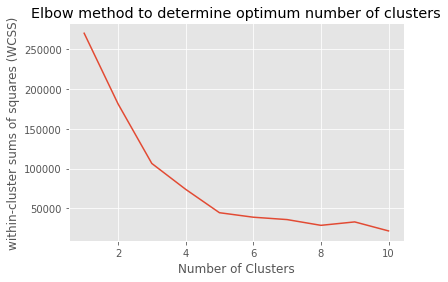

In [159]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [203]:
#based on these observations we try from K=5 and go up to 7
K=5
n_iter = 300

In [204]:
kmeans=KMeans()
kmeans.fit(X, K, n_iter)
Output,Centroids=kmeans.predict()

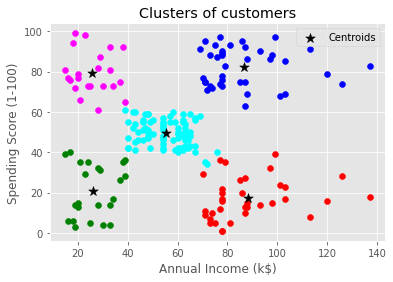

In [205]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.style.use('ggplot')
plt.grid(True)
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k]) #label=labels[k]
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='black',marker='*',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

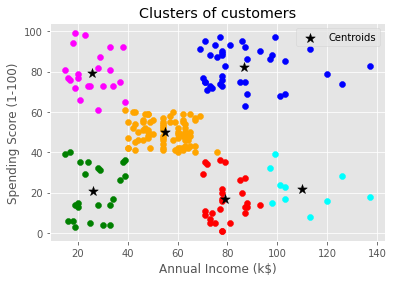

In [201]:
K=6
n_iter = 300

kmeans=KMeans()
kmeans.fit(X, K, n_iter)
Output,Centroids=kmeans.predict()

color=['red','blue','green','cyan','magenta','orange']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6']
plt.style.use('ggplot')
plt.grid(True)
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k]) #label=labels[k]
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='black',marker='*',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

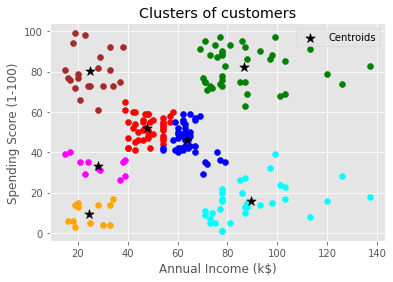

In [202]:
K=7
n_iter = 300

kmeans=KMeans()
kmeans.fit(X, K, n_iter)
Output,Centroids=kmeans.predict()

color=['red','blue','green','cyan','magenta','orange','brown']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7']
plt.style.use('ggplot')
plt.grid(True)
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k]) #label=labels[k]
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='black',marker='*',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()